In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from tabulate import tabulate 

# Importing and understanding our dataset
dataset1 = pd.read_csv("heart.csv")

Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset1[~((dataset1 < (Q1 - 1.5 * IQR)) | (dataset1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Train Test split
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

# K-Fold Cross-Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12)

mean_precision_scores = []
mean_recall_scores = []
mean_f1_scores = []
mean_sensitivity_scores = []
mean_specificity_scores = []
mean_accuracy_scores = []
# Model Fitting
models = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    svm.SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=7),
    DecisionTreeClassifier(random_state=12),
    RandomForestClassifier(random_state=12)
]


 Logistic Regression :


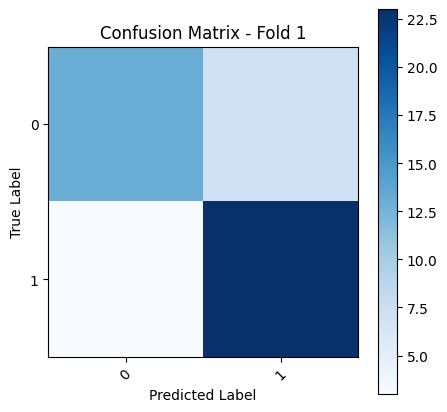

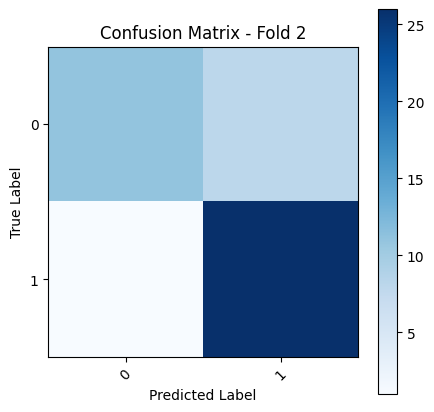

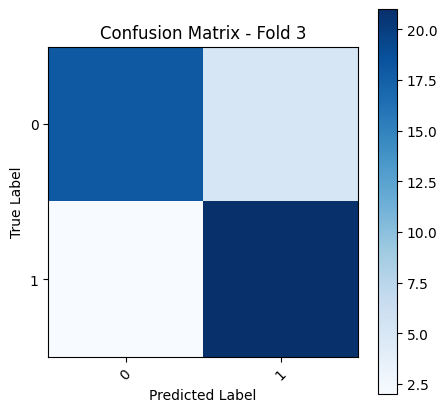

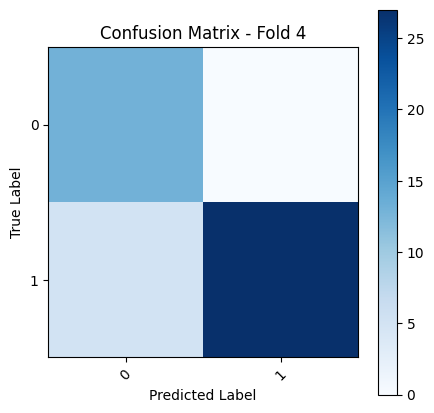

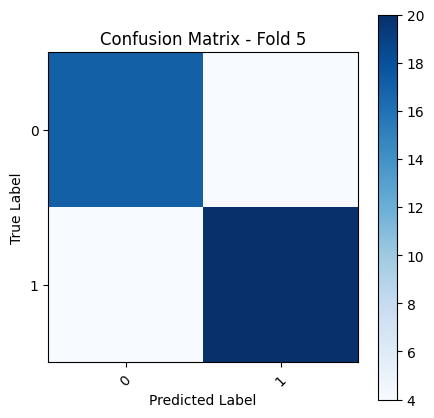

Results for Sensitivity, Specificity, and Accuracy:
+----------------+-------------+-------------+----------+-----------+--------+----------+
|  K Fold Number | Sensitivity | Specificity | Accuracy | Precision | Recall | F1 Score |
+----------------+-------------+-------------+----------+-----------+--------+----------+
|      1.0       |    0.885    |    0.65     |  0.783   |   0.767   | 0.885  |  0.821   |
|      2.0       |    0.963    |    0.579    |  0.804   |   0.765   | 0.963  |  0.852   |
|      3.0       |    0.913    |    0.783    |  0.848   |   0.808   | 0.913  |  0.857   |
|      4.0       |    0.844    |     1.0     |  0.889   |    1.0    | 0.844  |  0.915   |
|      5.0       |    0.833    |    0.81     |  0.822   |   0.833   | 0.833  |  0.833   |
+----------------+-------------+-------------+----------+-----------+--------+----------+

Mean Scores for Logistic Regression:
Precision: 0.834
Recall: 0.888
F1 Score: 0.856
Sensitivity: 0.888
Specificity: 0.764
Accuracy: 0.829

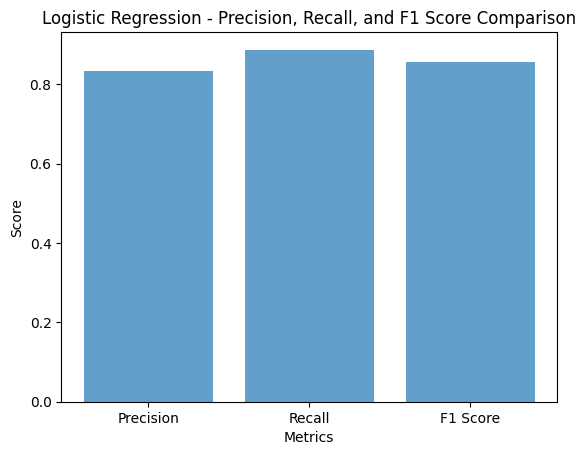

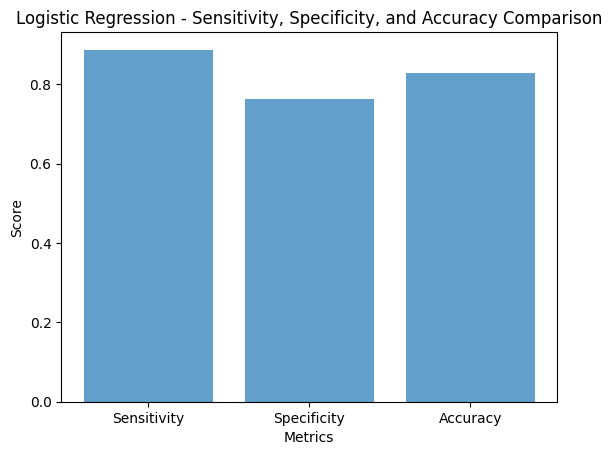

In [14]:

model_name = 'Logistic Regression'
model = LogisticRegression(max_iter=1000)
# Displaying results for each model

print(f"\n Logistic Regression :")

# Lists to store metrics for each fold
fold_sensitivity = []
fold_specificity = []
fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

# Cross-validation predictions
y_pred_cv = cross_val_score(model, predictors, target, cv=kf)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(predictors, target)):
    X_train, X_test = predictors.iloc[train_index], predictors.iloc[test_index]
    Y_train, Y_test = target.iloc[train_index], target.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.colorbar()

    classes = [0, 1]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()

    # Extracting TP, TN, FP, FN from confusion matrix
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    # Computing metrics for the current fold
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Appending results to fold-specific lists
    fold_sensitivity.append(sensitivity)
    fold_specificity.append(specificity)
    fold_accuracy.append(accuracy)
    fold_precision.append(precision)
    fold_recall.append(recall)
    fold_f1.append(f1)

fold_numbers = [1, 2, 3, 4, 5]
table_LR = pd.DataFrame({
    ' K Fold Number': fold_numbers,
    'Sensitivity': fold_sensitivity,
    'Specificity': fold_specificity,
    'Accuracy': fold_accuracy,
    'Precision': fold_precision,
    'Recall': fold_recall,
    'F1 Score': fold_f1,
}).round(3)

print("Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table_LR, headers='keys', tablefmt='pretty', showindex=False))

# Calculate mean scores and store them in lists
mean_sensitivity = np.mean(fold_sensitivity)
mean_specificity = np.mean(fold_specificity)
mean_accuracy = np.mean(fold_accuracy)
mean_precision = np.mean(fold_precision)
mean_recall = np.mean(fold_recall)
mean_f1 = np.mean(fold_f1)

# Append mean scores to respective lists
mean_sensitivity_scores.append(mean_sensitivity)
mean_specificity_scores.append(mean_specificity)
mean_accuracy_scores.append(mean_accuracy)
mean_precision_scores.append(mean_precision)
mean_recall_scores.append(mean_recall)
mean_f1_scores.append(mean_f1)

print(f"\nMean Scores for {model_name}:")
print(f"Precision: {np.mean(fold_precision):.3f}")
print(f"Recall: {np.mean(fold_recall):.3f}")
print(f"F1 Score: {np.mean(fold_f1):.3f}")
print(f"Sensitivity: {np.mean(fold_sensitivity):.3f}")
print(f"Specificity: {np.mean(fold_specificity):.3f}")
print(f"Accuracy: {np.mean(fold_accuracy):.3f}")

plt.figure()
plt.bar(["Precision", "Recall", "F1 Score"], [np.mean(fold_precision), np.mean(fold_recall), np.mean(fold_f1)], alpha=0.7)
plt.title(f'{model_name} - Precision, Recall, and F1 Score Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

# Plot 2: Sensitivity, Specificity, and Accuracy
plt.figure()
plt.bar(["Sensitivity", "Specificity", "Accuracy"],
        [np.mean(fold_sensitivity), np.mean(fold_specificity), np.mean(fold_accuracy)], alpha=0.7)
plt.title(f'{model_name} - Sensitivity, Specificity, and Accuracy Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()



Gaussian Naive Bayes:


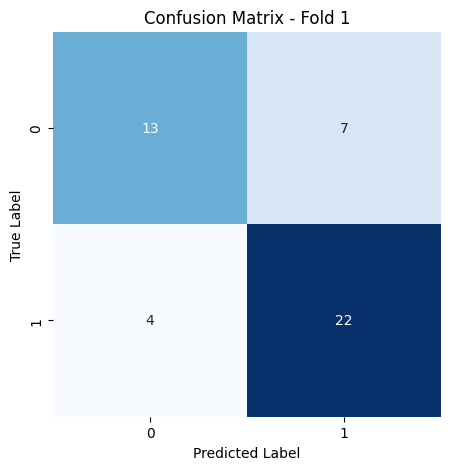

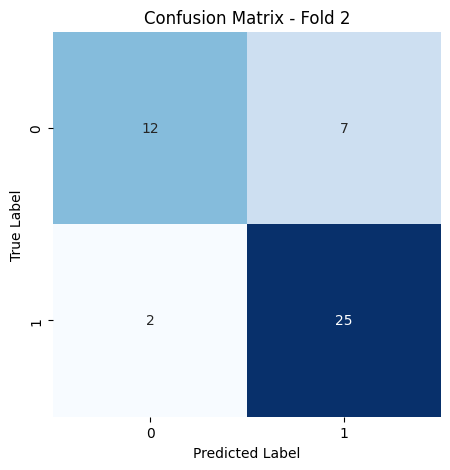

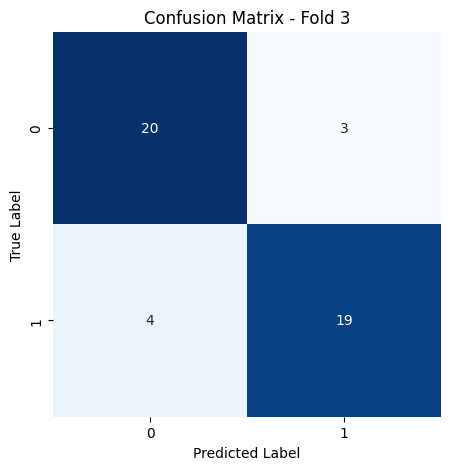

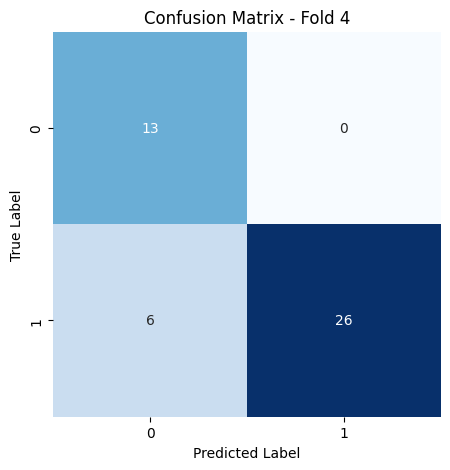

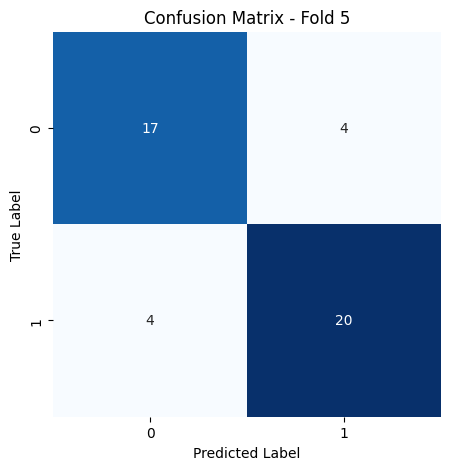

Results for Sensitivity, Specificity, and Accuracy:
+----------------+-------------+-------------+----------+-----------+--------+----------+
|  K Fold Number | Sensitivity | Specificity | Accuracy | Precision | Recall | F1 Score |
+----------------+-------------+-------------+----------+-----------+--------+----------+
|      1.0       |    0.846    |    0.65     |  0.761   |   0.759   | 0.846  |   0.8    |
|      2.0       |    0.926    |    0.632    |  0.804   |   0.781   | 0.926  |  0.847   |
|      3.0       |    0.826    |    0.87     |  0.848   |   0.864   | 0.826  |  0.844   |
|      4.0       |    0.812    |     1.0     |  0.867   |    1.0    | 0.812  |  0.897   |
|      5.0       |    0.833    |    0.81     |  0.822   |   0.833   | 0.833  |  0.833   |
+----------------+-------------+-------------+----------+-----------+--------+----------+

Mean Scores for Gaussian Naive Bayes:
Precision: 0.847
Recall: 0.849
F1 Score: 0.844
Sensitivity: 0.849
Specificity: 0.792
Accuracy: 0.82

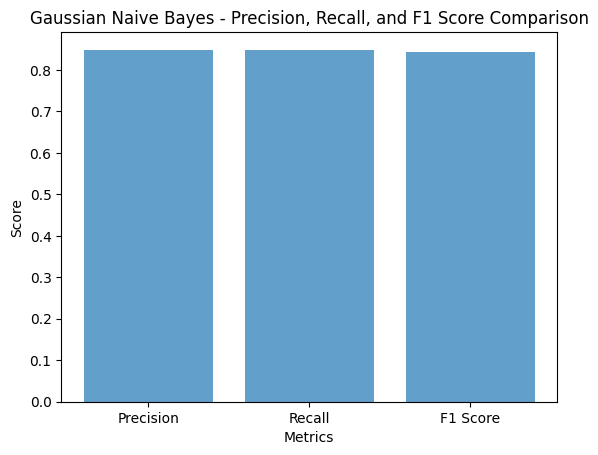

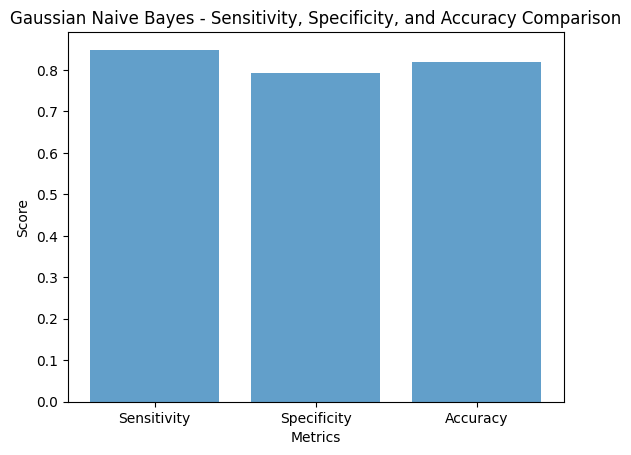

In [15]:
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
model_name = 'Gaussian Naive Bayes'
model = GaussianNB()

# Displaying results for the model
print(f"\n{model_name}:")

# Lists to store metrics for each fold
fold_sensitivity = []
fold_specificity = []
fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

# Cross-validation predictions
y_pred_cv = cross_val_score(model, predictors, target, cv=kf)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(predictors, target)):
    X_train, X_test = predictors.iloc[train_index], predictors.iloc[test_index]
    Y_train, Y_test = target.iloc[train_index], target.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Extracting TP, TN, FP, FN from confusion matrix
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    # Computing metrics for the current fold
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Appending results to fold-specific lists
    fold_sensitivity.append(sensitivity)
    fold_specificity.append(specificity)
    fold_accuracy.append(accuracy)
    fold_precision.append(precision)
    fold_recall.append(recall)
    fold_f1.append(f1)

fold_numbers = [1, 2, 3, 4, 5]
table_NB = pd.DataFrame({
    ' K Fold Number': fold_numbers,
    'Sensitivity': fold_sensitivity,
    'Specificity': fold_specificity,
    'Accuracy': fold_accuracy,
    'Precision': fold_precision,
    'Recall': fold_recall,
    'F1 Score': fold_f1,
}).round(3)

print("Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table_NB, headers='keys', tablefmt='pretty', showindex=False))


# Calculate mean scores and store them in lists
mean_sensitivity = np.mean(fold_sensitivity)
mean_specificity = np.mean(fold_specificity)
mean_accuracy = np.mean(fold_accuracy)
mean_precision = np.mean(fold_precision)
mean_recall = np.mean(fold_recall)
mean_f1 = np.mean(fold_f1)

# Append mean scores to respective lists
mean_sensitivity_scores.append(mean_sensitivity)
mean_specificity_scores.append(mean_specificity)
mean_accuracy_scores.append(mean_accuracy)
mean_precision_scores.append(mean_precision)
mean_recall_scores.append(mean_recall)
mean_f1_scores.append(mean_f1)

print(f"\nMean Scores for {model_name}:")
print(f"Precision: {np.mean(fold_precision):.3f}")
print(f"Recall: {np.mean(fold_recall):.3f}")
print(f"F1 Score: {np.mean(fold_f1):.3f}")
print(f"Sensitivity: {np.mean(fold_sensitivity):.3f}")
print(f"Specificity: {np.mean(fold_specificity):.3f}")
print(f"Accuracy: {np.mean(fold_accuracy):.3f}")

# Plot 1: Precision, Recall, and F1 Score
plt.figure()
plt.bar(["Precision", "Recall", "F1 Score"], [np.mean(fold_precision), np.mean(fold_recall), np.mean(fold_f1)], alpha=0.7)
plt.title(f'{model_name} - Precision, Recall, and F1 Score Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

# Plot 2: Sensitivity, Specificity, and Accuracy
plt.figure()
plt.bar(["Sensitivity", "Specificity", "Accuracy"],
        [np.mean(fold_sensitivity), np.mean(fold_specificity), np.mean(fold_accuracy)], alpha=0.7)
plt.title(f'{model_name} - Sensitivity, Specificity, and Accuracy Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()


SVM:


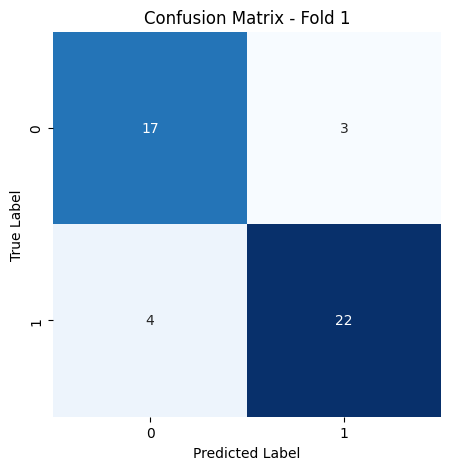

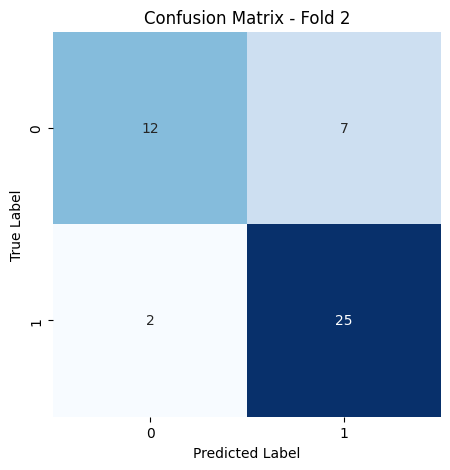

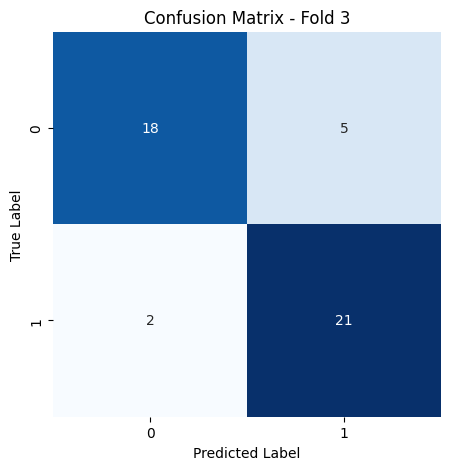

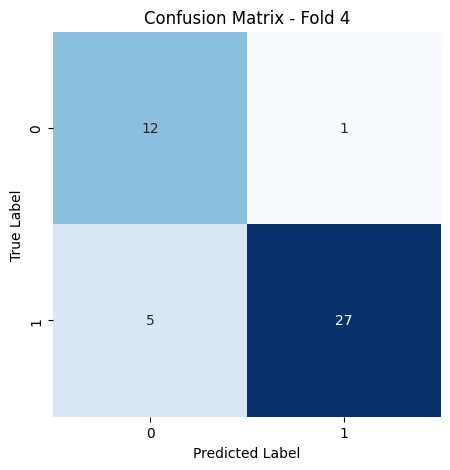

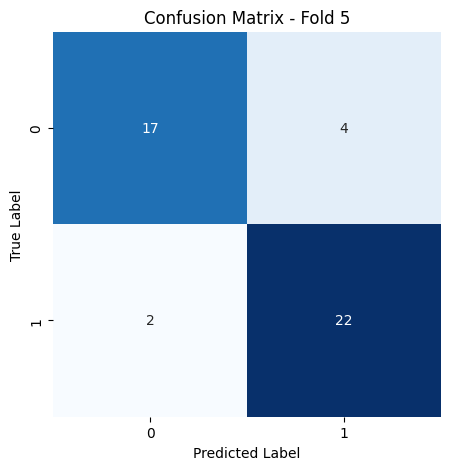

Results for Sensitivity, Specificity, and Accuracy:
+----------------+-------------+-------------+----------+-----------+--------+----------+
|  K Fold Number | Sensitivity | Specificity | Accuracy | Precision | Recall | F1 Score |
+----------------+-------------+-------------+----------+-----------+--------+----------+
|      1.0       |    0.846    |    0.85     |  0.848   |   0.88    | 0.846  |  0.863   |
|      2.0       |    0.926    |    0.632    |  0.804   |   0.781   | 0.926  |  0.847   |
|      3.0       |    0.913    |    0.783    |  0.848   |   0.808   | 0.913  |  0.857   |
|      4.0       |    0.844    |    0.923    |  0.867   |   0.964   | 0.844  |   0.9    |
|      5.0       |    0.917    |    0.81     |  0.867   |   0.846   | 0.917  |   0.88   |
+----------------+-------------+-------------+----------+-----------+--------+----------+

Mean Scores for SVM:
Precision: 0.856
Recall: 0.889
F1 Score: 0.869
Sensitivity: 0.889
Specificity: 0.799
Accuracy: 0.847


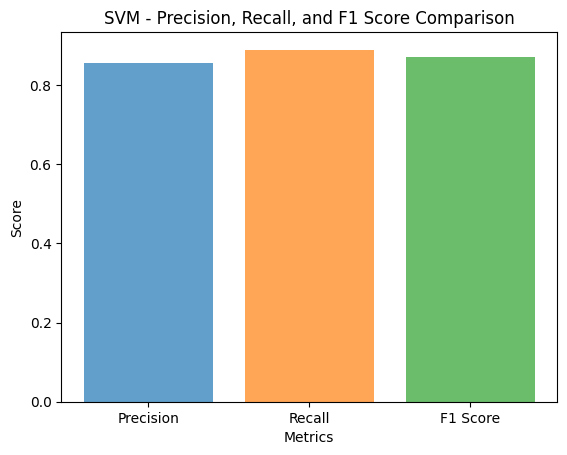

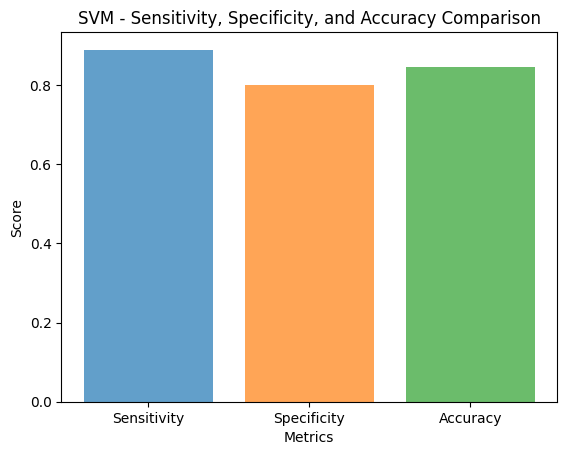

In [16]:
from sklearn.svm import SVC
model_name = 'SVM'
model = SVC(kernel='linear')  # You can change the kernel as needed

# Displaying results for the model
print(f"\n{model_name}:")

# Lists to store metrics for each fold
fold_sensitivity = []
fold_specificity = []
fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

# Cross-validation predictions
y_pred_cv = cross_val_score(model, predictors, target, cv=kf)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(predictors, target)):
    X_train, X_test = predictors.iloc[train_index], predictors.iloc[test_index]
    Y_train, Y_test = target.iloc[train_index], target.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Extracting TP, TN, FP, FN from confusion matrix
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    # Computing metrics for the current fold
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Appending results to fold-specific lists
    fold_sensitivity.append(sensitivity)
    fold_specificity.append(specificity)
    fold_accuracy.append(accuracy)
    fold_precision.append(precision)
    fold_recall.append(recall)
    fold_f1.append(f1)

fold_numbers = [1, 2, 3, 4, 5]
table_SVM = pd.DataFrame({
    ' K Fold Number': fold_numbers,
    'Sensitivity': fold_sensitivity,
    'Specificity': fold_specificity,
    'Accuracy': fold_accuracy,
    'Precision': fold_precision,
    'Recall': fold_recall,
    'F1 Score': fold_f1,
}).round(3)

print("Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table_SVM, headers='keys', tablefmt='pretty', showindex=False))


# Calculate mean scores and store them in lists
mean_sensitivity = np.mean(fold_sensitivity)
mean_specificity = np.mean(fold_specificity)
mean_accuracy = np.mean(fold_accuracy)
mean_precision = np.mean(fold_precision)
mean_recall = np.mean(fold_recall)
mean_f1 = np.mean(fold_f1)

# Append mean scores to respective lists
mean_sensitivity_scores.append(mean_sensitivity)
mean_specificity_scores.append(mean_specificity)
mean_accuracy_scores.append(mean_accuracy)
mean_precision_scores.append(mean_precision)
mean_recall_scores.append(mean_recall)
mean_f1_scores.append(mean_f1)

print(f"\nMean Scores for {model_name}:")
print(f"Precision: {np.mean(fold_precision):.3f}")
print(f"Recall: {np.mean(fold_recall):.3f}")
print(f"F1 Score: {np.mean(fold_f1):.3f}")
print(f"Sensitivity: {np.mean(fold_sensitivity):.3f}")
print(f"Specificity: {np.mean(fold_specificity):.3f}")
print(f"Accuracy: {np.mean(fold_accuracy):.3f}")


# Plot 1: Precision, Recall, and F1 Score
plt.figure()
plt.bar(["Precision", "Recall", "F1 Score"],
        [np.mean(fold_precision), np.mean(fold_recall), np.mean(fold_f1)],
        color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
        alpha=0.7)
plt.title(f'{model_name} - Precision, Recall, and F1 Score Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

# Plot 2: Sensitivity, Specificity, and Accuracy
plt.figure()
plt.bar(["Sensitivity", "Specificity", "Accuracy"],
        [np.mean(fold_sensitivity), np.mean(fold_specificity), np.mean(fold_accuracy)],
        color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
        alpha=0.7)
plt.title(f'{model_name} - Sensitivity, Specificity, and Accuracy Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()



Decision Tree:


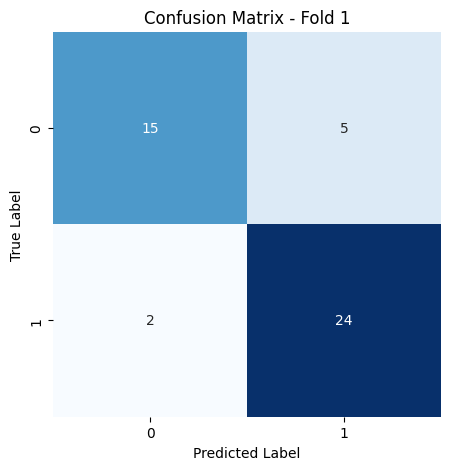

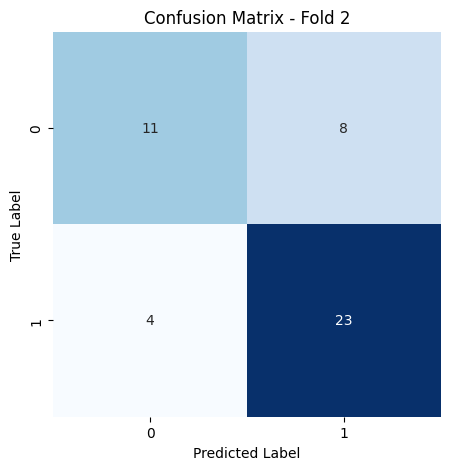

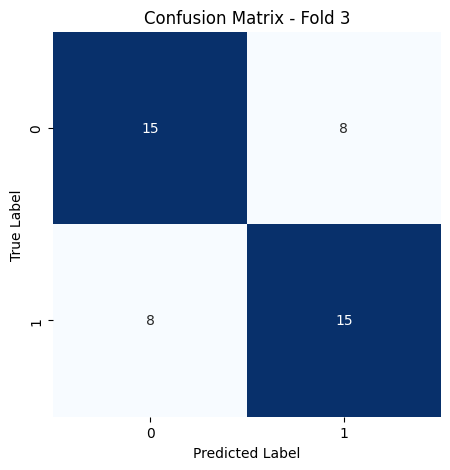

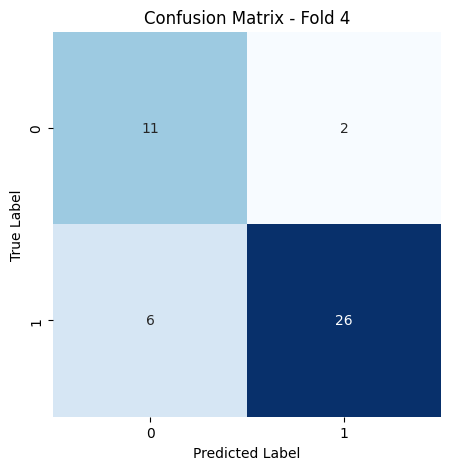

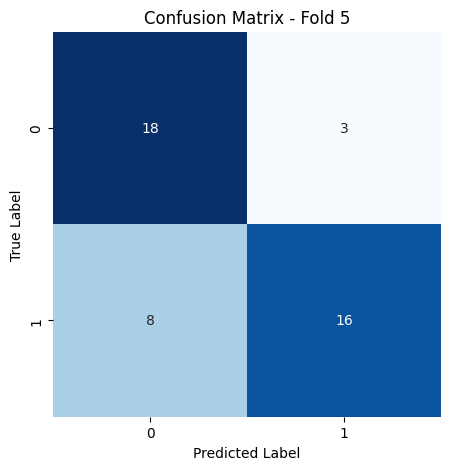

Results for Sensitivity, Specificity, and Accuracy:
+----------------+-------------+-------------+----------+-----------+--------+----------+
|  K Fold Number | Sensitivity | Specificity | Accuracy | Precision | Recall | F1 Score |
+----------------+-------------+-------------+----------+-----------+--------+----------+
|      1.0       |    0.923    |    0.75     |  0.848   |   0.828   | 0.923  |  0.873   |
|      2.0       |    0.852    |    0.579    |  0.739   |   0.742   | 0.852  |  0.793   |
|      3.0       |    0.652    |    0.652    |  0.652   |   0.652   | 0.652  |  0.652   |
|      4.0       |    0.812    |    0.846    |  0.822   |   0.929   | 0.812  |  0.867   |
|      5.0       |    0.667    |    0.857    |  0.756   |   0.842   | 0.667  |  0.744   |
+----------------+-------------+-------------+----------+-----------+--------+----------+

Mean Scores for Decision Tree:
Precision: 0.798
Recall: 0.781
F1 Score: 0.786
Sensitivity: 0.781
Specificity: 0.737
Accuracy: 0.763


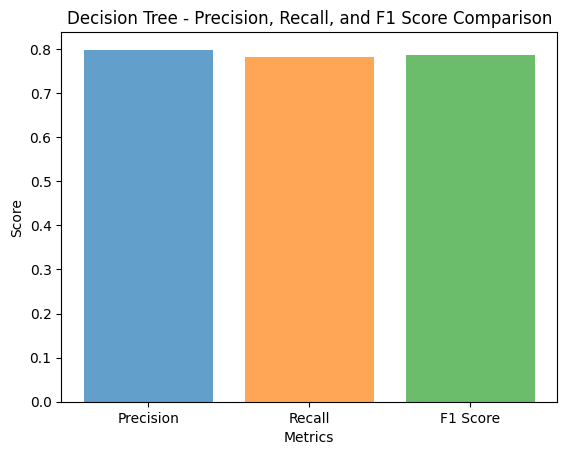

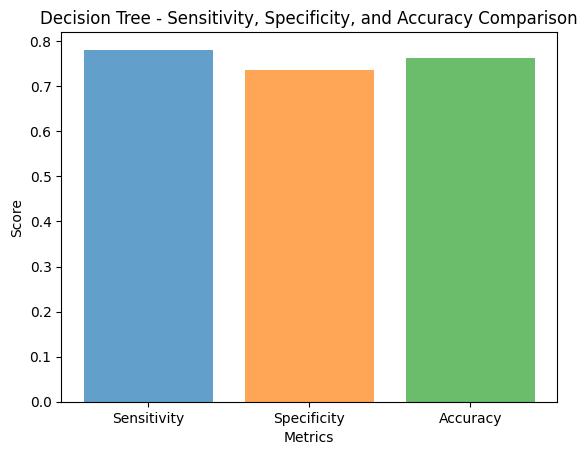

In [17]:
# Model Fitting
model_name = 'Decision Tree'
model = DecisionTreeClassifier(random_state=12)

# Displaying results for the model
print(f"\n{model_name}:")

# Lists to store metrics for each fold
fold_sensitivity = []
fold_specificity = []
fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

# Cross-validation predictions
y_pred_cv = cross_val_score(model, predictors, target, cv=kf)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(predictors, target)):
    X_train, X_test = predictors.iloc[train_index], predictors.iloc[test_index]
    Y_train, Y_test = target.iloc[train_index], target.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Extracting TP, TN, FP, FN from confusion matrix
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    # Computing metrics for the current fold
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Appending results to fold-specific lists
    fold_sensitivity.append(sensitivity)
    fold_specificity.append(specificity)
    fold_accuracy.append(accuracy)
    fold_precision.append(precision)
    fold_recall.append(recall)
    fold_f1.append(f1)

fold_numbers = [1, 2, 3, 4, 5]
table_DT = pd.DataFrame({
    ' K Fold Number': fold_numbers,
    'Sensitivity': fold_sensitivity,
    'Specificity': fold_specificity,
    'Accuracy': fold_accuracy,
    'Precision': fold_precision,
    'Recall': fold_recall,
    'F1 Score': fold_f1,
}).round(3)

print("Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table_DT, headers='keys', tablefmt='pretty', showindex=False))


# Calculate mean scores and store them in lists
mean_sensitivity = np.mean(fold_sensitivity)
mean_specificity = np.mean(fold_specificity)
mean_accuracy = np.mean(fold_accuracy)
mean_precision = np.mean(fold_precision)
mean_recall = np.mean(fold_recall)
mean_f1 = np.mean(fold_f1)

# Append mean scores to respective lists
mean_sensitivity_scores.append(mean_sensitivity)
mean_specificity_scores.append(mean_specificity)
mean_accuracy_scores.append(mean_accuracy)
mean_precision_scores.append(mean_precision)
mean_recall_scores.append(mean_recall)
mean_f1_scores.append(mean_f1)

print(f"\nMean Scores for {model_name}:")
print(f"Precision: {np.mean(fold_precision):.3f}")
print(f"Recall: {np.mean(fold_recall):.3f}")
print(f"F1 Score: {np.mean(fold_f1):.3f}")
print(f"Sensitivity: {np.mean(fold_sensitivity):.3f}")
print(f"Specificity: {np.mean(fold_specificity):.3f}")
print(f"Accuracy: {np.mean(fold_accuracy):.3f}")

# Plot 1: Precision, Recall, and F1 Score
plt.figure()
plt.bar(["Precision", "Recall", "F1 Score"],
        [np.mean(fold_precision), np.mean(fold_recall), np.mean(fold_f1)],
        color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
        alpha=0.7)
plt.title(f'{model_name} - Precision, Recall, and F1 Score Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

# Plot 2: Sensitivity, Specificity, and Accuracy
plt.figure()
plt.bar(["Sensitivity", "Specificity", "Accuracy"],
        [np.mean(fold_sensitivity), np.mean(fold_specificity), np.mean(fold_accuracy)],
        color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
        alpha=0.7)
plt.title(f'{model_name} - Sensitivity, Specificity, and Accuracy Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()



Random Forest:


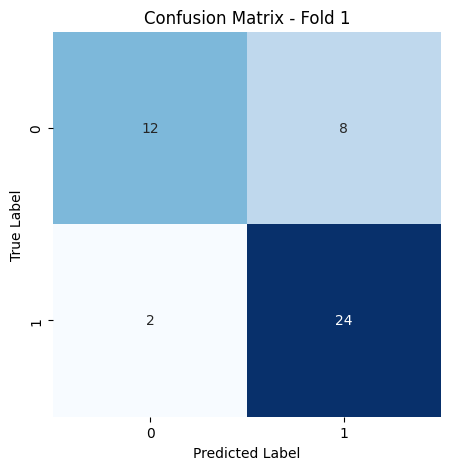

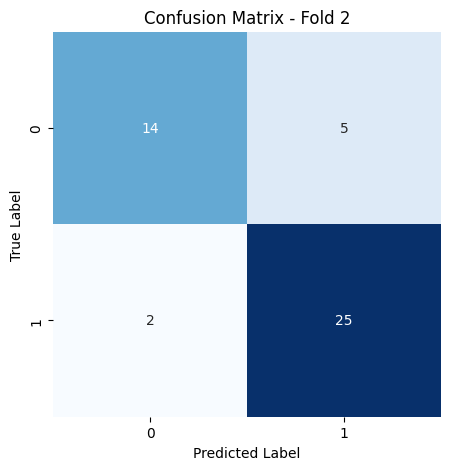

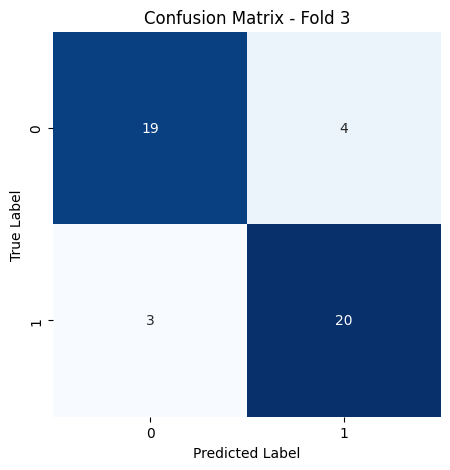

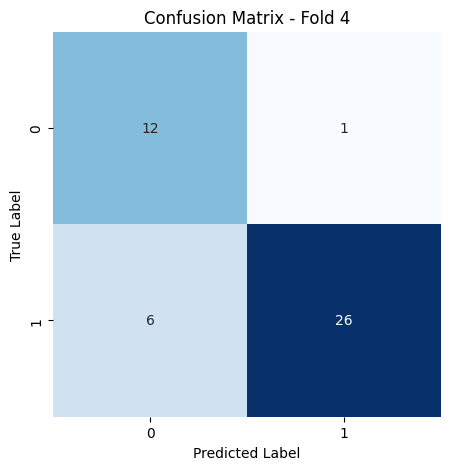

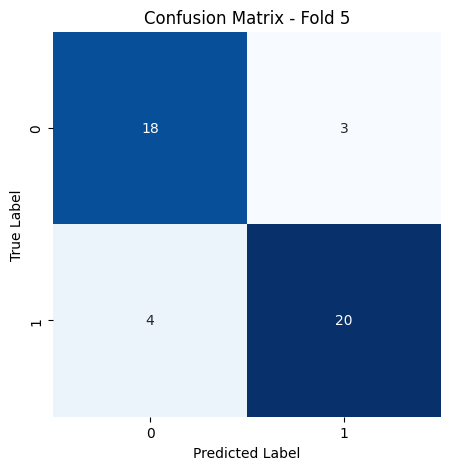

Results for Sensitivity, Specificity, and Accuracy:
+----------------+-------------+-------------+----------+-----------+--------+----------+
|  K Fold Number | Sensitivity | Specificity | Accuracy | Precision | Recall | F1 Score |
+----------------+-------------+-------------+----------+-----------+--------+----------+
|      1.0       |    0.923    |     0.6     |  0.783   |   0.75    | 0.923  |  0.828   |
|      2.0       |    0.926    |    0.737    |  0.848   |   0.833   | 0.926  |  0.877   |
|      3.0       |    0.87     |    0.826    |  0.848   |   0.833   |  0.87  |  0.851   |
|      4.0       |    0.812    |    0.923    |  0.844   |   0.963   | 0.812  |  0.881   |
|      5.0       |    0.833    |    0.857    |  0.844   |   0.87    | 0.833  |  0.851   |
+----------------+-------------+-------------+----------+-----------+--------+----------+

Mean Scores for Random Forest:
Precision: 0.850
Recall: 0.873
F1 Score: 0.858
Sensitivity: 0.873
Specificity: 0.789
Accuracy: 0.833


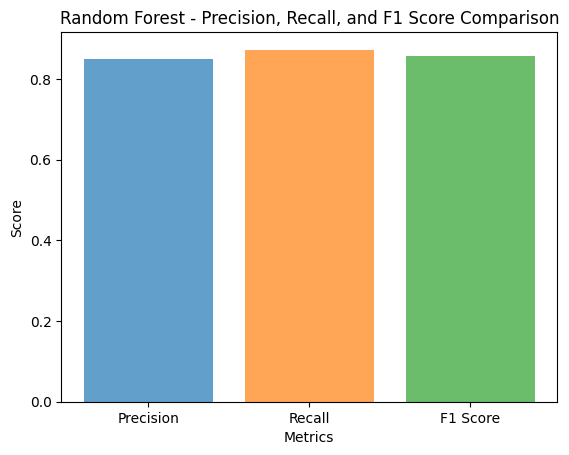

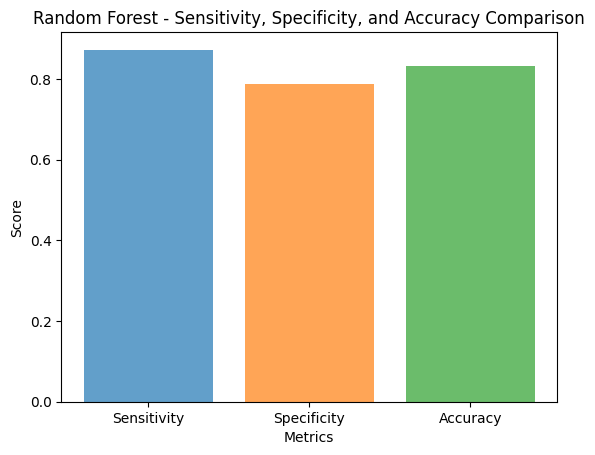

In [18]:
# Model Fitting
model_name = 'Random Forest'
model = RandomForestClassifier(random_state=12)

# Displaying results for the model
print(f"\n{model_name}:")

# Lists to store metrics for each fold
fold_sensitivity = []
fold_specificity = []
fold_accuracy = []
fold_precision = []
fold_recall = []
fold_f1 = []

# Cross-validation predictions
y_pred_cv = cross_val_score(model, predictors, target, cv=kf)

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(predictors, target)):
    X_train, X_test = predictors.iloc[train_index], predictors.iloc[test_index]
    Y_train, Y_test = target.iloc[train_index], target.iloc[test_index]

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Confusion matrix
    conf_matrix = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Extracting TP, TN, FP, FN from confusion matrix
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    # Computing metrics for the current fold
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Appending results to fold-specific lists
    fold_sensitivity.append(sensitivity)
    fold_specificity.append(specificity)
    fold_accuracy.append(accuracy)
    fold_precision.append(precision)
    fold_recall.append(recall)
    fold_f1.append(f1)

fold_numbers = [1, 2, 3, 4, 5]
table_RF = pd.DataFrame({
    ' K Fold Number': fold_numbers,
    'Sensitivity': fold_sensitivity,
    'Specificity': fold_specificity,
    'Accuracy': fold_accuracy,
    'Precision': fold_precision,
    'Recall': fold_recall,
    'F1 Score': fold_f1,
}).round(3)

print("Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table_RF, headers='keys', tablefmt='pretty', showindex=False))


# Calculate mean scores and store them in lists
mean_sensitivity = np.mean(fold_sensitivity)
mean_specificity = np.mean(fold_specificity)
mean_accuracy = np.mean(fold_accuracy)
mean_precision = np.mean(fold_precision)
mean_recall = np.mean(fold_recall)
mean_f1 = np.mean(fold_f1)

# Append mean scores to respective lists
mean_sensitivity_scores.append(mean_sensitivity)
mean_specificity_scores.append(mean_specificity)
mean_accuracy_scores.append(mean_accuracy)
mean_precision_scores.append(mean_precision)
mean_recall_scores.append(mean_recall)
mean_f1_scores.append(mean_f1)

print(f"\nMean Scores for {model_name}:")
print(f"Precision: {np.mean(fold_precision):.3f}")
print(f"Recall: {np.mean(fold_recall):.3f}")
print(f"F1 Score: {np.mean(fold_f1):.3f}")
print(f"Sensitivity: {np.mean(fold_sensitivity):.3f}")
print(f"Specificity: {np.mean(fold_specificity):.3f}")
print(f"Accuracy: {np.mean(fold_accuracy):.3f}")

# Plot 1: Precision, Recall, and F1 Score
plt.figure()
plt.bar(["Precision", "Recall", "F1 Score"],
        [np.mean(fold_precision), np.mean(fold_recall), np.mean(fold_f1)],
        color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
        alpha=0.7)
plt.title(f'{model_name} - Precision, Recall, and F1 Score Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

# Plot 2: Sensitivity, Specificity, and Accuracy
plt.figure()
plt.bar(["Sensitivity", "Specificity", "Accuracy"],
        [np.mean(fold_sensitivity), np.mean(fold_specificity), np.mean(fold_accuracy)],
        color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
        alpha=0.7)
plt.title(f'{model_name} - Sensitivity, Specificity, and Accuracy Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

In [23]:
selected_classifiers = {
    "logistic regression": LogisticRegression(max_iter=1000),
    "naive bayes": GaussianNB(),
    "support vector machine": svm.SVC(kernel='linear'),
    "decision tree": DecisionTreeClassifier(random_state=12),
    "random forest": RandomForestClassifier(random_state=12)
}

classifier_algorithms = list(selected_classifiers.keys())
# Create tables
table1 = pd.DataFrame({
    'Classifier Algorithm': classifier_algorithms,
    'Sensitivity': mean_sensitivity_scores,
    'Specificity': mean_specificity_scores,
    'Accuracy': mean_accuracy_scores,
}).round(3)

table2 = pd.DataFrame({
    'Classifier Algorithm': classifier_algorithms,
    'Precision': mean_precision_scores,
    'Recall': mean_recall_scores,
    'F1 Score': mean_f1_scores
}).round(3)

# Print tables
print("Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table1, headers='keys', tablefmt='pretty', showindex=False))

print("\nResults for Precision, Recall, and F1 Score:")
print(tabulate(table2, headers='keys', tablefmt='pretty', showindex=False))

Results for Sensitivity, Specificity, and Accuracy:
+------------------------+-------------+-------------+----------+
|  Classifier Algorithm  | Sensitivity | Specificity | Accuracy |
+------------------------+-------------+-------------+----------+
|  logistic regression   |    0.888    |    0.764    |  0.829   |
|      naive bayes       |    0.849    |    0.792    |   0.82   |
| support vector machine |    0.889    |    0.799    |  0.847   |
|     decision tree      |    0.781    |    0.737    |  0.763   |
|     random forest      |    0.873    |    0.789    |  0.833   |
+------------------------+-------------+-------------+----------+

Results for Precision, Recall, and F1 Score:
+------------------------+-----------+--------+----------+
|  Classifier Algorithm  | Precision | Recall | F1 Score |
+------------------------+-----------+--------+----------+
|  logistic regression   |   0.834   | 0.888  |  0.856   |
|      naive bayes       |   0.847   | 0.849  |  0.844   |
| support vec

Accuracy of Each Alogorithm 

logistic regression --  0.83
naive bayes --  0.82
support vector machine --  0.85
decision tree --  0.76
random forest --  0.83


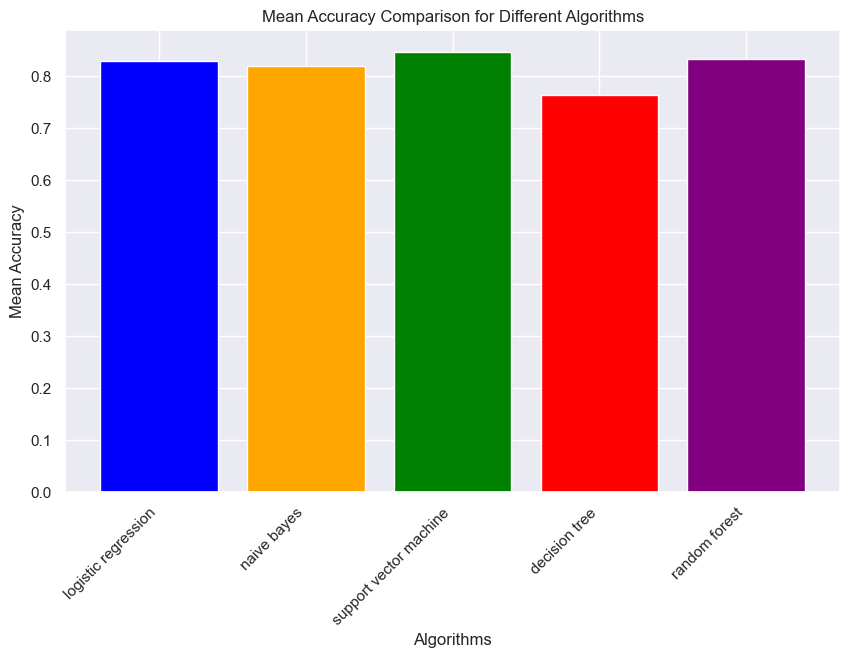

In [24]:
print("Accuracy of Each Alogorithm \n")
for algorithm, accuracy in zip(classifier_algorithms, mean_accuracy_scores):
    print(f"{algorithm} --  {accuracy:.2f}")


sns.set(rc={'figure.figsize': (10, 6)})
plt.bar(classifier_algorithms, mean_accuracy_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Mean Accuracy Comparison for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Mean Accuracy')

plt.xticks(rotation=45, ha='right')
plt.show()